In [1]:
import pandas as pd
import tensorflow as tf

Downloading the data

In [6]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/applied-dl/heart.csv')

In [7]:
csv_file

'/root/.keras/datasets/heart.csv'

In [16]:
df = pd.read_csv(csv_file)

EDA

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [21]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes

In [22]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,2,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,4,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,4,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,4,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int8   
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), int8(1)
memory usage: 31.2 KB


In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,3.303630,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.625258,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,4.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,4.000000,1.000000


In [27]:
target = df.pop('target')

In [28]:
target

0      0
1      1
2      0
3      0
4      0
      ..
298    0
299    1
300    1
301    1
302    1
Name: target, Length: 303, dtype: int64

In [31]:
dataset = tf.data.Dataset.from_tensor_slices((df,target))
dataset

<TakeDataset shapes: ((13,), ()), types: (tf.float64, tf.int64)>

In [32]:
for feat, targ in dataset.take(5):
  print(f'Feature: {feat}, Target: {targ}')

Feature: [ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
   2. ], Target: 0
Feature: [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
   3. ], Target: 1
Feature: [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
   4. ], Target: 0
Feature: [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
   3. ], Target: 0
Feature: [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
   3. ], Target: 0


In [34]:
tf.constant(df["thal"])

<tf.Tensor: shape=(303,), dtype=int8, numpy=
array([2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 2, 3, 2, 4, 4, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 2, 4, 3, 4, 3, 4, 4,
       2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4,
       4, 2, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4,
       3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 2, 4, 4, 2, 3, 3, 4, 4, 3, 4,
       3, 3, 4, 2, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 2,
       4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 4, 3, 4, 2, 4, 3,
       3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4, 3, 2, 4, 3, 3, 2,
       4, 4, 4, 4, 3, 0, 3, 3, 3, 3, 1, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3,
      

In [36]:
train_dataset = dataset.shuffle(len(dataset)).batch(1)

In [37]:
def get_compiled_model():
  model = tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
                               tf.keras.layers.Dense(10,activation='relu'),
                               tf.keras.layers.Dense(1)])
  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [40]:
model = get_compiled_model()
history = model.fit(train_dataset, epochs=20)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

303/303 [==============================] - 0s 909us/step - loss: 1.6910 - accuracy: 0.6304
Epoch 2/20
303/303 [==============================] - 0s 1ms/step - loss: 0.9390 - accuracy: 0.6832
Epoch 3/20
303/303 [==============================] - 0s 1ms/step - loss: 0.7482 - accuracy: 0.7063
Epoch 4/20
303/303 [==============================] - 0s 1ms/step - loss: 0.7464 - accuracy: 0.6997
Epoch 5/20
303/303 [==============================] - 0s 987us/step - loss: 0.6242 - accuracy: 0.7162
Epoc

In [41]:
import matplotlib.pyplot as plt

In [43]:
history.history['accuracy']

[0.6303630471229553,
 0.6831682920455933,
 0.7062706351280212,
 0.6996699571609497,
 0.7161716222763062,
 0.7128713130950928,
 0.7458745837211609,
 0.7590758800506592,
 0.7557755708694458,
 0.7524752616882324,
 0.7524752616882324,
 0.7656765580177307,
 0.7821782231330872,
 0.7788779139518738,
 0.7920792102813721,
 0.7623762488365173,
 0.7689769268035889,
 0.8118811845779419,
 0.7821782231330872,
 0.7920792102813721]

Text(0, 0.5, 'accuracy')

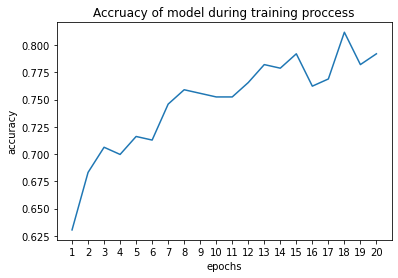

In [49]:
acc = history.history['accuracy']

epochs = range(1,21)
plt.plot(epochs, acc)
plt.title('Accruacy of model during training proccess')
plt.xticks(epochs)
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'training loss')

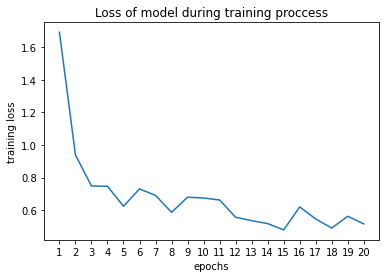

In [51]:
loss = history.history['loss']
epochs = range(1,21)
plt.plot(epochs, loss)
plt.title('Loss of model during training proccess')
plt.xticks(epochs)
plt.xlabel('epochs')
plt.ylabel('training loss')